In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

____________
# Basics
_________

In [7]:
df['zip'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [9]:
df['title'].nunique()

141

____________
# Creating New Features
_________

In [10]:
df['reason'] = df['title'].apply(lambda reason: reason.split(':')[0])

In [11]:
df['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

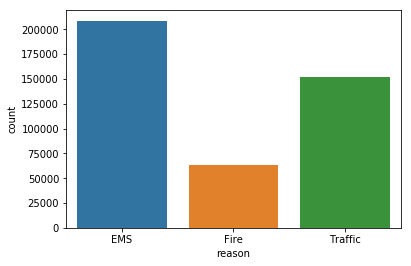

In [12]:
sns.countplot(x='reason', data=df)

In [13]:
type(df['timeStamp'][0])

str

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [16]:
df.head(30)

lat        lng                                               desc  \
0   40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1   40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2   40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3   40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4   40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5   40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6   40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7   40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8   40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9   40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   
10  40.231990 -75.251891  RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...   
11  40.084161 -75.308386  BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...   
12  40.174131 -75.098491  BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...   
13  40.062974 -75.135914  OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...   
14  40.097222 -75.376195  SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...   
15  40.223778 -75.235399  STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...   
16  40.243258 -75.286552  SUSQUEHANNA AVE & W MAIN ST;  LANSDALE; Statio...   
17  40.312181 -75.574260  CHARLOTTE ST & MILES RD;  NEW HANOVER; Station...   
18  40.114239 -75.338508  PENN ST & ARCH ST;  NORRISTOWN; Station 308A; ...   
19  40.209337 -75.135266  COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...   
20  40.114239 -75.338508  PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...   
21  40.117948 -75.209848  CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...   
22  40.199006 -75.300058  LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...   
23  40.143326 -75.422819  RT422  & PAWLINGS RD OVERPASS; LOWER PROVIDENC...   
24  40.153268 -75.189558  SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...   
25  40.133037 -75.408463  SHANNONDELL DR & SHANNONDELL BLVD;  LOWER PROV...   
26  40.155283 -75.264230  PENLLYN BLUE BELL PIKE & VILLAGE CIR;  WHITPAI...   
27  40.028903 -75.351822  EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...   
28  40.097222 -75.376195  SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...   
29  40.209337 -75.135266  COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...   

        zip                           title           timeStamp  \
0   19525.0          EMS: BACK PAINS/INJURY 2015-12-10 17:10:52   
1   19446.0         EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21   
2   19401.0             Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21   
3   19401.0          EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36   
4       NaN                  EMS: DIZZINESS 2015-12-10 16:56:52   
5   19446.0                EMS: HEAD INJURY 2015-12-10 15:39:04   
6   19044.0            EMS: NAUSEA/VOMITING 2015-12-10 16:46:48   
7   19426.0      EMS: RESPIRATORY EMERGENCY 2015-12-10 16:17:05   
8   19438.0           EMS: SYNCOPAL EPISODE 2015-12-10 16:51:42   
9   19462.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:35:41   
10      NaN     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:33:50   
11  19428.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 16:32:10   
12  19040.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:15:49   
13  19027.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:12:47   
14      NaN     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:09:49   
15  18936.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:31:00   
16  19446.0      EMS: RESPIRATORY EMERGENCY 2015-12-10 17:42:44   
17  19525.0                  EMS: DIZZINESS 2015-12-10 17:41:54   
18  19401.0           EMS: VEHICLE ACCIDENT 2015-12-10 17:43:29   
19  18974.0     Traffic: DISABLED VEHICLE - 2015-12-10 17:45:23   
20  19401.0     Traffic: VEHICLE ACCIDENT - 2015-12-10 17:43:45   
21  19031.0     Traffic: DISABLED VEHICLE - 2015-12-10 17:53:22   
22  19446.0        

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [19]:
df

lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
5       40.253473 -75.283245   
6       40.182111 -75.127795   
7       40.217286 -75.405182   
8       40.289027 -75.399590   
9       40.102398 -75.291458   
10      40.231990 -75.251891   
11      40.084161 -75.308386   
12      40.174131 -75.098491   
13      40.062974 -75.135914   
14      40.097222 -75.376195   
15      40.223778 -75.235399   
16      40.243258 -75.286552   
17      40.312181 -75.574260   
18      40.114239 -75.338508   
19      40.209337 -75.135266   
20      40.114239 -75.338508   
21      40.117948 -75.209848   
22      40.199006 -75.300058   
23      40.143326 -75.422819   
24      40.153268 -75.189558   
25      40.133037 -75.408463   
26      40.155283 -75.264230   
27      40.028903 -75.351822   
28      40.097222 -75.376195   
29      40.209337 -75.135266   
...           ...        ...   
423879  40.284894 -75.583070   
423880  40.089043 -75.154857   
423881  40.188195 -75.195506   
423882  40.188195 -75.195506   
423883  40.175671 -75.125148   
423884  40.277468 -75.260462   
423885  40.345292 -75.509276   
423886  40.260591 -75.503238   
423887  40.136020 -75.354606   
423888  40.230934 -75.522125   
423889  40.150675 -75.132652   
423890  40.335354 -75.511268   
423891  40.150675 -75.132652   
423892  40.107400 -75.113206   
423893  40.256628 -75.261270   
423894  40.183361 -75.542285   
423895  40.184797 -75.286879   
423896  40.254344 -75.407617   
423897  40.149952 -75.134537   
423898  40.142797 -75.495065   
423899  40.149952 -75.134537   
423900  40.157913 -75.203632   
423901  40.133037 -75.408463   
423902  40.271663 -75.238440   
423903  40.235373 -75.224751   
423904  40.139993 -75.049864   
423905  40.270121 -75.382825   
423906  40.270121 -75.382825   
423907  40.190946 -75.237285   
423908  40.155164 -75.264665   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
5       CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...  19446.0   
6       LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...  19044.0   
7       COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...  19426.0   
8       MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...  19438.0   
9       BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...  19462.0   
10      RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...      NaN   
11      BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...  19428.0   
12      BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...  19040.0   
13      OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...  19027.0   
14      SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...      NaN   
15      STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...  18936.0   
16      SUSQUEHANNA AVE & W MAIN ST;  LANSDALE; Statio...  19446.0   
17      CHARLOTTE ST & MILES RD;  NEW HANOVER; Station...  19525.0   
18      PENN ST & ARCH ST;  NORRISTOWN; Station 308A; ...  19401.0   
19      COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...  18974.0   
20      PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...  19401.0   
21      CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...  19031.0   
22      LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...  19446.0   
23      RT422  & PAWLINGS RD OVERPASS; LOWER PROVIDENC...      NaN   
24      SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...      NaN   
25      SHANNONDELL DR & SHANNONDELL BLVD;  LOWER PROV...  19403.0   
26      PENLLYN BLUE BELL PIKE & VILLAGE CIR;  WHITPAI...  19422.0   
27      EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...  19085.0   

In [20]:
import matplotlib.pyplot as plt

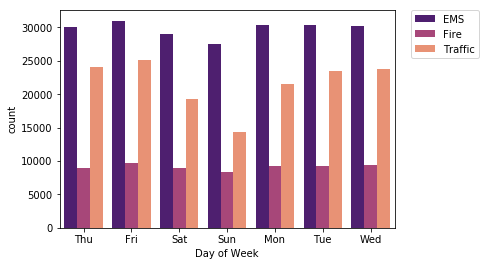

In [21]:
sns.countplot(x='Day of Week', hue='reason', data= df, palette = 'magma')

# realocar a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

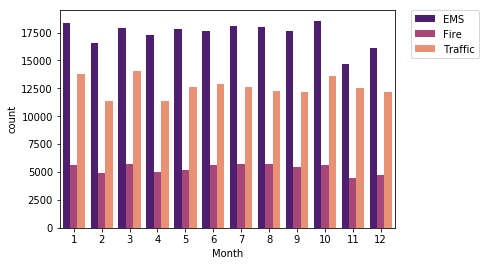

In [22]:
sns.countplot(x='Month', hue='reason', data= df, palette = 'magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
byMonth = df.groupby('Month').count()

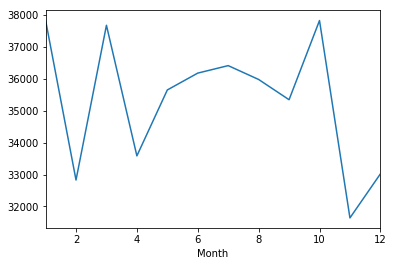

In [24]:
byMonth['e'].plot()

In [25]:
# Could be any column
byMonth

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      37824  37824  37824  33480  37824      37824  37812  37824  37824   
2      32828  32828  32828  28963  32828      32828  32817  32828  32828   
3      37666  37666  37666  33416  37666      37666  37651  37666  37666   
4      33583  33583  33583  29488  33583      33583  33575  33583  33583   
5      35644  35644  35644  31114  35644      35644  35628  35644  35644   
6      36171  36171  36171  31501  36171      36171  36152  36171  36171   
7      36405  36405  36405  31863  36405      36405  36391  36405  36405   
8      35972  35972  35972  31512  35972      35972  35957  35972  35972   
9      35339  35339  35339  30772  35339      35339  35325  35339  35339   
10     37815  37815  37815  32919  37815      37815  37809  37815  37815   
11     31643  31643  31643  27776  31643      31643  31628  31643  31643   
12     33019  33019  33019  28976  33019      33019  33005  33019  33019   

       reason   Hour  Day of Week  
Month                              
1       37824  37824        37824  
2       32828  32828        32828  
3       37666  37666        37666  
4       33583  33583        33583  
5       35644  35644        35644  
6       36171  36171        36171  
7       36405  36405        36405  
8       35972  35972        35972  
9       35339  35339        35339  
10      37815  37815        37815  
11      31643  31643        31643  
12      33019  33019        33019

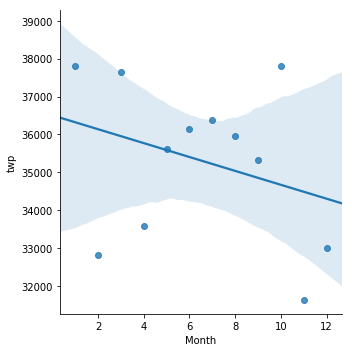

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [27]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

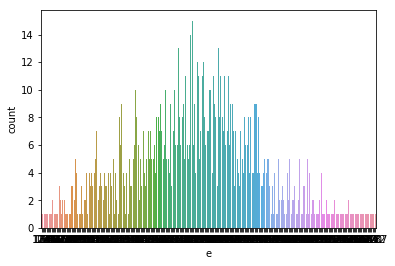

In [28]:
byDate = df.groupby('Date').count()
sns.countplot(byDate['e'])

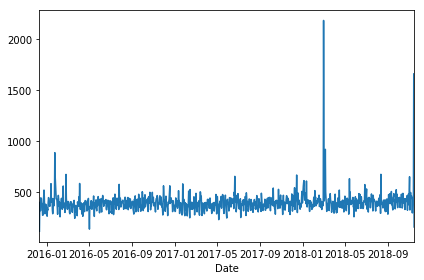

In [29]:
byDate['twp'].plot()
plt.tight_layout()

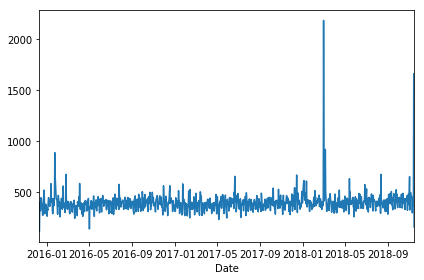

In [30]:
byDate['e'].plot()
plt.tight_layout()

In [31]:
df

lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
5       40.253473 -75.283245   
6       40.182111 -75.127795   
7       40.217286 -75.405182   
8       40.289027 -75.399590   
9       40.102398 -75.291458   
10      40.231990 -75.251891   
11      40.084161 -75.308386   
12      40.174131 -75.098491   
13      40.062974 -75.135914   
14      40.097222 -75.376195   
15      40.223778 -75.235399   
16      40.243258 -75.286552   
17      40.312181 -75.574260   
18      40.114239 -75.338508   
19      40.209337 -75.135266   
20      40.114239 -75.338508   
21      40.117948 -75.209848   
22      40.199006 -75.300058   
23      40.143326 -75.422819   
24      40.153268 -75.189558   
25      40.133037 -75.408463   
26      40.155283 -75.264230   
27      40.028903 -75.351822   
28      40.097222 -75.376195   
29      40.209337 -75.135266   
...           ...        ...   
423879  40.284894 -75.583070   
423880  40.089043 -75.154857   
423881  40.188195 -75.195506   
423882  40.188195 -75.195506   
423883  40.175671 -75.125148   
423884  40.277468 -75.260462   
423885  40.345292 -75.509276   
423886  40.260591 -75.503238   
423887  40.136020 -75.354606   
423888  40.230934 -75.522125   
423889  40.150675 -75.132652   
423890  40.335354 -75.511268   
423891  40.150675 -75.132652   
423892  40.107400 -75.113206   
423893  40.256628 -75.261270   
423894  40.183361 -75.542285   
423895  40.184797 -75.286879   
423896  40.254344 -75.407617   
423897  40.149952 -75.134537   
423898  40.142797 -75.495065   
423899  40.149952 -75.134537   
423900  40.157913 -75.203632   
423901  40.133037 -75.408463   
423902  40.271663 -75.238440   
423903  40.235373 -75.224751   
423904  40.139993 -75.049864   
423905  40.270121 -75.382825   
423906  40.270121 -75.382825   
423907  40.190946 -75.237285   
423908  40.155164 -75.264665   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
5       CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...  19446.0   
6       LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...  19044.0   
7       COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...  19426.0   
8       MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...  19438.0   
9       BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...  19462.0   
10      RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...      NaN   
11      BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...  19428.0   
12      BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...  19040.0   
13      OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...  19027.0   
14      SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...      NaN   
15      STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...  18936.0   
16      SUSQUEHANNA AVE & W MAIN ST;  LANSDALE; Statio...  19446.0   
17      CHARLOTTE ST & MILES RD;  NEW HANOVER; Station...  19525.0   
18      PENN ST & ARCH ST;  NORRISTOWN; Station 308A; ...  19401.0   
19      COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...  18974.0   
20      PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...  19401.0   
21      CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...  19031.0   
22      LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...  19446.0   
23      RT422  & PAWLINGS RD OVERPASS; LOWER PROVIDENC...      NaN   
24      SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...      NaN   
25      SHANNONDELL DR & SHANNONDELL BLVD;  LOWER PROV...  19403.0   
26      PENLLYN BLUE BELL PIKE & VILLAGE CIR;  WHITPAI...  19422.0   
27      EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...  19085.0   

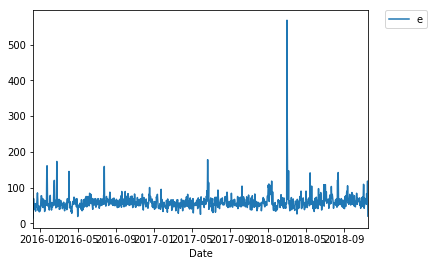

In [44]:
df[df['reason'] == 'Fire'].groupby('Date').count()['e'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

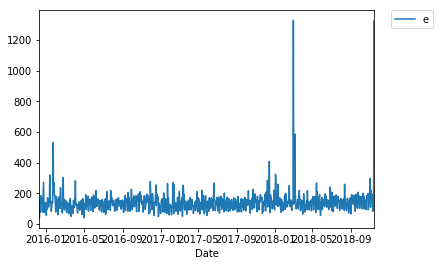

In [45]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['e'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

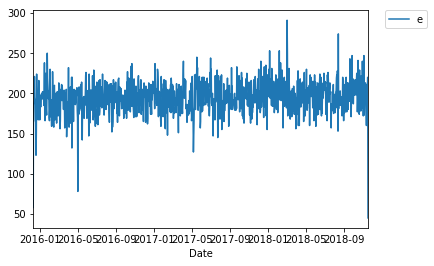

In [46]:
df[df['reason'] == 'EMS'].groupby('Date').count()['e'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [67]:
df3 = df.groupby(['Day of Week', 'Hour']).count()['e'].unstack()

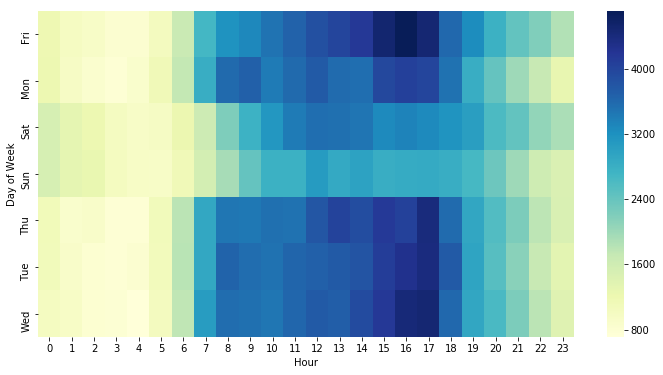

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df3, cmap='YlGnBu')

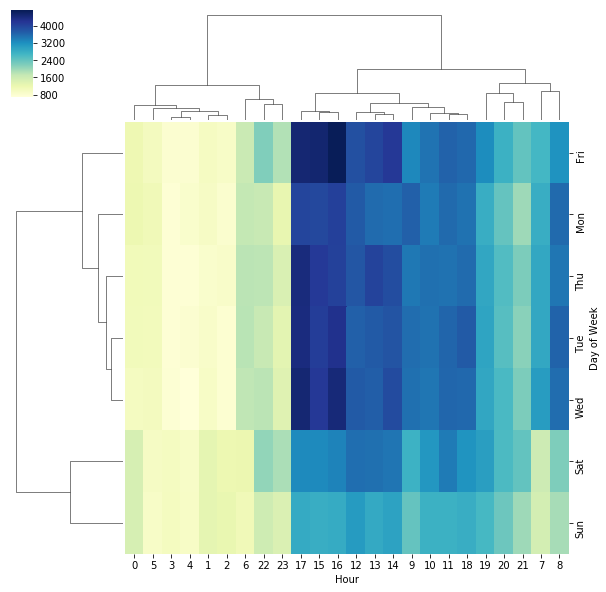

In [74]:
sns.clustermap(df3, cmap='YlGnBu')

In [84]:
df3 = df.groupby(['Day of Week', 'Month']).count()['e'].unstack()

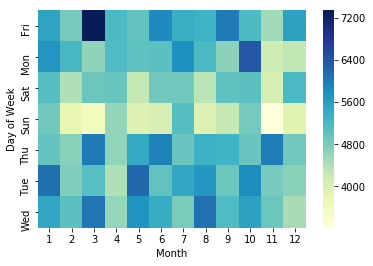

In [91]:
sns.heatmap(df3,cmap = 'YlGnBu')

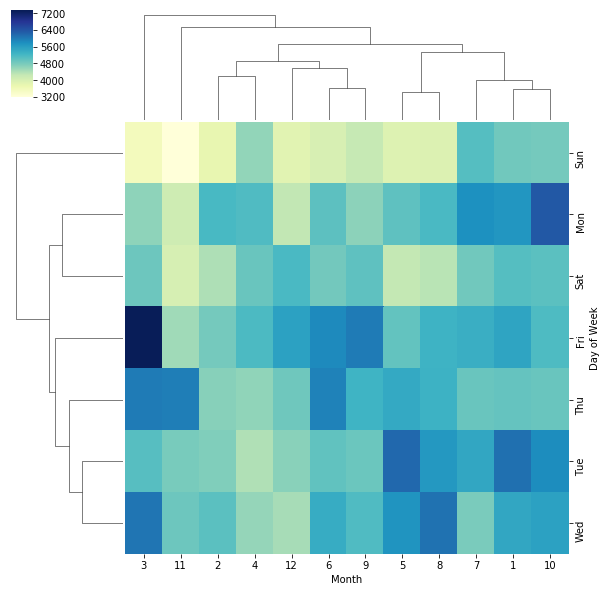

In [87]:
sns.clustermap(df3, cmap = 'YlGnBu')